In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import os
import matplotlib.pyplot as plt

print(os.listdir("../input"))

['final-bought-dataset.csv']


In [2]:
bought_df = pd.read_csv('../input/final-bought-dataset.csv')
bought_df.head()

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
0,11,214717089,784,65.33,385,12,0.157778,1,385,3,3,1,2,0,0,0.27,0
1,11,214743335,784,65.33,385,12,0.157778,1,43,3,3,1,2,0,0,0.07,0
2,11,214563337,784,65.33,385,12,0.157778,1,27,3,3,1,2,0,0,0.02,0
3,11,214819762,784,65.33,385,12,0.157778,1,20,3,3,1,2,0,1,0.13,0
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,0


In [3]:
len(bought_df), len(bought_df[bought_df['purchased']==1]), len(bought_df[bought_df['purchased']==0])

(2314687, 1049817, 1264870)

In [4]:
df = pd.DataFrame(bought_df)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['purchased'], axis=1)
y = df[['purchased']]
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30)
X_test, X_validate, y_test, y_validate  = train_test_split(X_test_val, y_test_val, test_size=0.50)
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((1620280, 16),
 (347204, 16),
 (347203, 16),
 (1620280, 1),
 (347204, 1),
 (347203, 1))

In [6]:
## NaiveBayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_validate)

In [7]:
from sklearn.metrics import roc_curve, auc, accuracy_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_validate, y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Validation set metrics:-")
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_validate))

Validation set metrics:-
roc_auc 0.5064216619960765
accuracy_score 0.5508001059895623


In [8]:
y_pred = model.predict(X_test)

Test data metrics:-


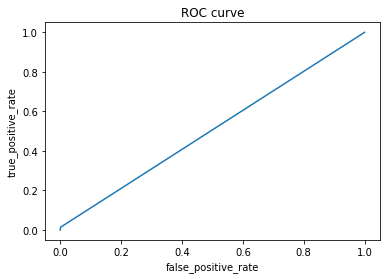

roc_auc 0.5064393293361613
accuracy_score 0.5523540983228832


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test.values.ravel(), y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Test data metrics:-")
plt.title("ROC curve")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate,true_positive_rate)

plt.show() 
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_test))

In [10]:
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['purchased'])
what_to_buy_df = pd.merge(X_test, y_pred, left_index=True, right_index=True)
what_to_buy_df.head(3)

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
1416569,7216606,214850291,256,42.67,205,6,0.527500,1,34,2,2,2,256,1,1,0.59,0
175623,887087,214821032,4668,70.73,1532,66,0.183061,1,44,4,4,3,19,0,0,0.13,0
1659394,8399659,214851137,2218,130.47,632,17,0.325000,1,33,0,0,2,1217,0,0,0.27,0


In [11]:
unique_sid = what_to_buy_df['session'].unique()

fp = open("solution.dat","w")

for sid in unique_sid:
#     all_items = what_to_buy_df['session'==sid , 'item']
    bought_items = what_to_buy_df.loc[(what_to_buy_df['session']==sid) & (what_to_buy_df['purchased']==1), 'item'].values
    if len(bought_items)>0:
        items = ','.join(map(str, bought_items))
        print(f"{sid};{items}") 
        
        print(f"{sid};{','.join(map(str, bought_items))}", file=fp) 

        
fp.close()


6713493;214839947
2968279;643078800
3711197;214826990
3871487;643078800
2742597;643078800
2504109;643078800
3887309;643078800
4624896;214829280
10657213;214688115
2249692;643078800
1919213;214819721
8207817;214848302
267491;214821285
7885669;214687907
3833476;643078800
7467097;214850741
3113404;643078800
2631788;643078800
9759298;214853767
2822379;643078800
10129707;214718220
2614379;643078800
11166046;214695695
3376506;214834867
3687098;643078800
6575486;214551926
3138067;643078800
4457936;214717241
2344822;643078800
10722077;214854358
2618053;643078800
2256208;643078800
9597369;214510445
3420706;643078800
3123523;643078800
3704212;643078800
2682933;643078800
2405519;643078800
3254461;643078800
9037227;214678387
3937389;643078800
3967619;643078800
2679993;643078800
10920046;214853996
10627104;214840867
3437633;643078800
3179978;643078800
3450463;643078800
2729167;643078800
3525562;643078800
3862756;643078800
3118203;643078800
3576858;643078800
2871172;643078800
8645739;214853090
33293

In [12]:
# A sample session id with what to buy and not buy
what_to_buy_df[what_to_buy_df['session']==11]

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
